# LP2: Vodafone Customer Churn Prediction

## Business Understanding

### 1. Project Description/Background

> Given the large number of customers the Telecommunication industry service providers have and the competitive nature of their products/services, the rate at which customers can stop using one provider's product/service in preference for another provider is high. Moreover, the providers can't afford the time to have dedicated attention to each client so that they know when they are dissatified with their products/services and the cost of acquiring a new client as compared to maintaining an existing one is very high.
>
> Therefore, Telcos have a pressing need to use their data from customer interactions to predict with high accuracy the customers that are likely to switch from using their products/services so that they can invest in mitigation startegies to maintain those clients, thereby, increasing their market position and profits.
>
> In this project we utilize the Vodafone Corporation data and Machine Learning models to predict with high accuracy the likelihood of a customer stopping the use of its products/services. We will also identify the factors affecting customer churn and suggest strategies the Telco can deploy to retain a high percentage of its customers. 

#### 2. Features
There are 17 categorical features:

> - CustomerID: Unique identifier for each customer
> - gender: Whether the customer is a male or a female
> - SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
> - Partner: Whether the customer has a partner or not (Yes, No)
> - Dependent: Whether the customer has dependents or not (Yes, No)
> - PhoneService: Whether the customer has a phone service or not (Yes, No)
> - MultipeLines: Whether the customer has multiple lines (Yes, No, No phone service)
> - InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
> - OnlineSecurity: Whether the customer has online security (Yes, No, No internet service)
> - OnlineBackup: Whether the customer has an online backup (Yes, No, No internet service)
> - DeviceProtection: Whether the customer has device protection (Yes, No, No internet service)
> - TechSupport: Whether the customer has tech support (Yes, No, No internet service)
> - StreamingTV: Whether the customer streams TV (Yes, No, No internet service)
> - StreamingMovies: Whether the customer streams movies (Yes, No, No internet service)
> - Contract: The contract term of the customer (Month-to-month, One year, Two years)
> - PaperlessBilling: Whether the customer does paperless Billing or not (True, False)
> - PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

Next, there are 3 numerical features:

> - Tenure: Number of months the customer has stayed with the company
> - MonthlyCharges: The amount charged to the customer monthly
> - TotalCharges: The total amount charged to the customer

Finally, there’s a prediction feature:

> - Churn: Whether the customer churned or not (Yes or No)

These features can also be subdivided into:

**Demographic customer information:**
> gender , SeniorCitizen , Partner , Dependents

**Services that each customer has signed up for:**
> PhoneService , MultipleLines , InternetService , OnlineSecurity , OnlineBackup , DeviceProtection , TechSupport , StreamingTV , StreamingMovies,

**Customer account information:**
> tenure , Contract , PaperlessBilling , PaymentMethod , MonthlyCharges , TotalCharges

### 3. Hypothesis

**Null Hypothesis (H0):** Contract duration has no effect on the probability of customer churn.

**Alternative Hypothesis (H1):** Contract duration significantly affects the probability of customer churn.

### 4. Analytical Questions
> 1. Does the monthly and total charges affect the probability of a customer churning?
> 2. How does contract duration affect the probability of a customer churning?
> 3. How likely are customers with a tenure of more than 5 years likely to churn?
> 4. Which payment method has the customers with the highest churn rate?
> 5. Which demographic factor(s) most affects the customer churn rate?
> 6. Which customer service has the highest churn rate?

## Data Understanding

### Importation

In [1]:
# Data Handling
import pandas as pd  # For data manipulation and analysis using DataFrames
import numpy as np  # For numerical operations and arrays
import warnings  # To handle warnings in a way that they can be ignored
warnings.filterwarnings('ignore')
import math  # Basic mathematical operations
import pyodbc  # For handling connections to Microsoft SQL Server
from dotenv import dotenv_values  # For loading environment variables, possibly including database credentials

# Data Visualization
import matplotlib.pyplot as plt  # For creating visualizations using Matplotlib
import seaborn as sns  # Enhanced data visualization based on Matplotlib

# Feature Processing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler  # Various preprocessing techniques for encoding categorical variables and scaling numerical features
from sklearn.impute import SimpleImputer  # For handling missing values
from sklearn.preprocessing import PowerTransformer  # Applying power transformations to make data more Gaussian-like
from sklearn.tree import DecisionTreeClassifier  # Decision tree-based classification
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors classification
from sklearn.ensemble import RandomForestClassifier  # Random Forest classification
from sklearn.naive_bayes import GaussianNB  # Gaussian Naive Bayes classification
from scipy.stats import f_oneway  # For one-way ANOVA statistical test

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score  # For splitting data into training and testing sets, and performing cross-validation
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Random Forest and Gradient Boosting classifiers
from sklearn.linear_model import LogisticRegression  # Logistic Regression classifier
from sklearn.svm import SVC  # Support Vector Machine classifier

# from lightgbm import LGBMClassifier  # LightGBM classifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score # Various metrics for evaluating model performance
from sklearn.metrics import precision_recall_curve, auc, f1_score, precision_score, recall_score
from sklearn.compose import ColumnTransformer  # Applies transformers to columns of an array or pandas DataFrame
from sklearn.pipeline import Pipeline  # Helps to streamline a lot of routine processes in machine learning pipelines
from sklearn.preprocessing import FunctionTransformer  # Custom transformations in pipelines
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler  # Techniques for handling imbalanced datasets through oversampling
from sklearn.preprocessing import StandardScaler  # Standardizes features by removing the mean and scaling to unit variance
from imblearn.pipeline import Pipeline as imbpipeline  # Combines imbalanced learning techniques with scikit-learn's Pipeline

# Hyperparameters Fine-tuning
from sklearn.model_selection import RandomizedSearchCV  # Techniques for hyperparameter tuning
from sklearn.model_selection import GridSearchCV # Techniques for hyperparameter tuning
from sklearn.feature_selection import SelectKBest, mutual_info_classif  # Feature selection techniques



In [2]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')


# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("UID")
password = environment_variables.get("PWD")

# Connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [3]:

# Establish a connection
connection = pyodbc.connect(connection_string)


##  Load Dataset

### 1.Load First Dataset (from remote database)

In [4]:
query = "Select * from LP2_Telco_churn_first_3000"

data = pd.read_sql(query, connection)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


### 2. Load Second Dataset (from GitHub)

In [5]:
# Read Excel file into DataFrame for the second-2000
data_2000 = pd.read_csv('LP2_Telco-churn-second-2000.csv')
data_2000.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


### 3. Load Testing Dataset (from OneDrive)

In [6]:
# Read CSV files into DataFrames
data_test = pd.read_excel('Telco-churn-last-2000.xlsx')
data_test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


 ## EDA

###  Explore data

1. First Dataset

In [7]:
# Display basic information about the first dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [8]:
# Check for duplicated rows
data.duplicated().sum()

0

In [9]:
# Checking missing values for First dataset
data.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [10]:
# Descriptive statistics
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,3000.000000,3000.000000,2995.000000
mean,32.527333,65.347400,2301.278315
std,24.637768,30.137053,2274.987884
min,0.000000,18.400000,18.799999
25%,9.000000,35.787499,415.250000
50%,29.000000,70.900002,1404.650024
75%,56.000000,90.262501,3868.725098
max,72.000000,118.650002,8564.750000


In [11]:
# Display basic information about the dataset
data_2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


Standardization of the datasets

In [12]:
# Check for duplicated rows
data_2000.duplicated().sum()

0

In [13]:
data_2000.shape

(2043, 21)

In [14]:
# Checking missing values for First dataset
data_2000.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
# Descriptive statistics
data_2000.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,2043.000000,2043.000000,2043.000000
mean,0.168380,32.649046,64.712555
std,0.374295,24.376248,29.970010
min,0.000000,0.000000,18.550000
25%,0.000000,9.000000,35.825000
50%,0.000000,30.000000,70.250000
75%,0.000000,55.000000,89.625000
max,1.000000,72.000000,118.350000


In [16]:
# Display basic information about the dataset
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [17]:
# Check for duplicated rows
data_test.duplicated().sum()

0

In [18]:
# Checking missing values for First dataset
data_test.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [19]:
# Descriptive statistics
data_test.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,2000.000000,2000.000000,2000.000000
mean,0.161500,31.853000,63.933325
std,0.368084,24.632677,30.136858
min,0.000000,0.000000,18.250000
25%,0.000000,8.000000,34.250000
50%,0.000000,27.000000,69.800000
75%,0.000000,55.000000,89.275000
max,1.000000,72.000000,118.750000


In [20]:
data_2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [22]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [23]:
data_2000.shape

(2043, 21)

In [24]:
data_2000.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [25]:
data_test.shape

(2000, 20)

In [26]:
# Concatenate training and evaluation datasets
combined_data = pd.concat([data, data_2000], ignore_index=True)

# Verify the structure of the combined dataset
combined_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Performing EDA for Concatenated Dataset

In [27]:
combined_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [28]:
# Display basic information about the dataset
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [29]:
#Check for null values for Concatenated dataset
combined_data.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [30]:
# Check for duplicated rows for Concatenated dataset
combined_data.duplicated().sum()

0

In [31]:
# Display summary statistics for Concatenated dataset
combined_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5043.000000,5043.000000,5043.000000
mean,0.162403,32.576641,65.090214
std,0.368857,24.529807,30.068133
min,0.000000,0.000000,18.400000
25%,0.000000,9.000000,35.775000
50%,0.000000,29.000000,70.550003
75%,0.000000,56.000000,90.050003
max,1.000000,72.000000,118.650002


## Univariate, Bi-variate, Multi-variate Analysis

### 1. Univariate

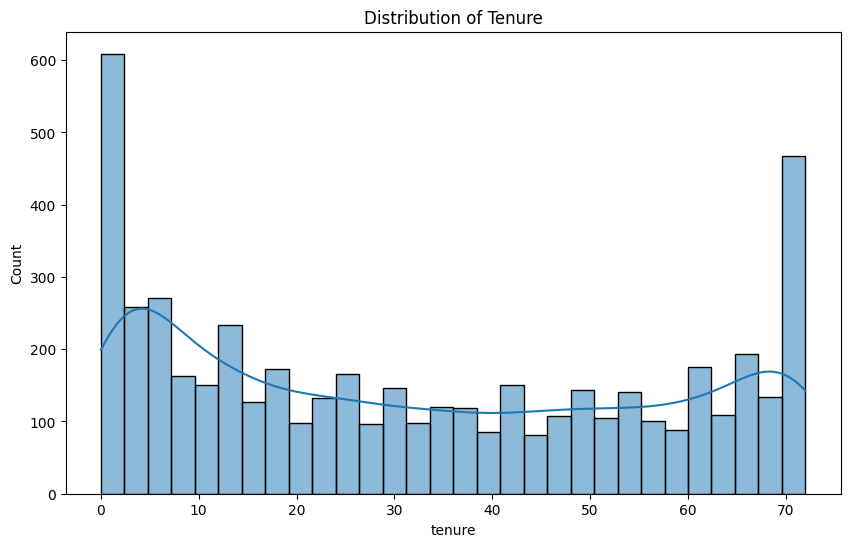

In [32]:
# Univariate Analysis

# Histogram of tenure
plt.figure(figsize=(10, 6))
sns.histplot(combined_data['tenure'], bins=30, kde=True)
plt.title('Distribution of Tenure')
plt.show()

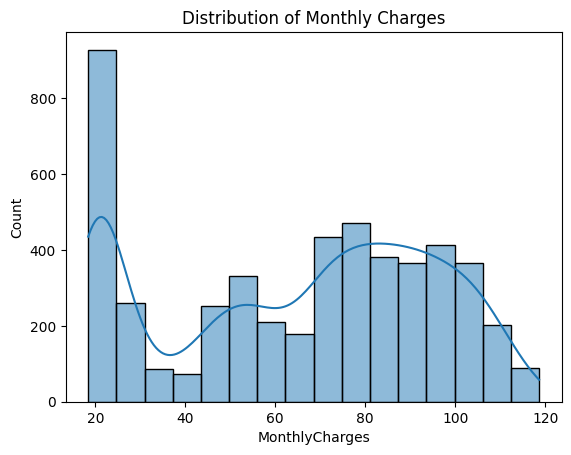

In [33]:
# Univariate analysis for 'MonthlyCharges'
sns.histplot(combined_data['MonthlyCharges'], kde=True)
plt.title('Distribution of Monthly Charges')
plt.show()


### 2. Bivariate Analysis

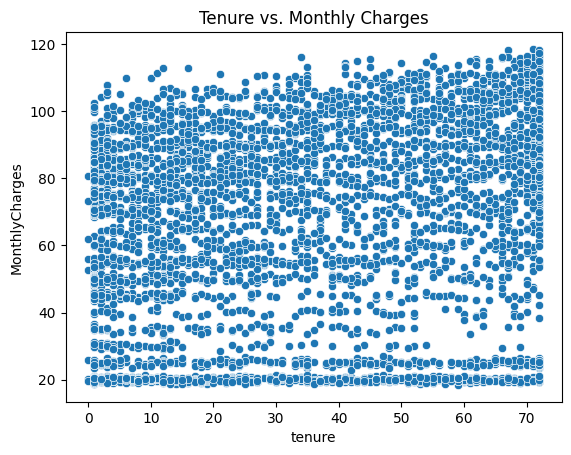

In [34]:
# Bivariate analysis for 'tenure' vs. 'MonthlyCharges'
sns.scatterplot(x='tenure', y='MonthlyCharges', data=combined_data)
plt.title('Tenure vs. Monthly Charges')
plt.show()

### Calculate correlation

In [35]:
# Convert non-numeric values to NaN in 'TotalCharges'
combined_data['TotalCharges'] = pd.to_numeric(combined_data['TotalCharges'], errors='coerce')

# Selecting the numerical columns
numeric_columns = combined_data[['tenure', 'MonthlyCharges', 'TotalCharges']]

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Display the correlation matrix
correlation_matrix.T

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.240645,0.826264
MonthlyCharges,0.240645,1.000000,0.647007
TotalCharges,0.826264,0.647007,1.000000


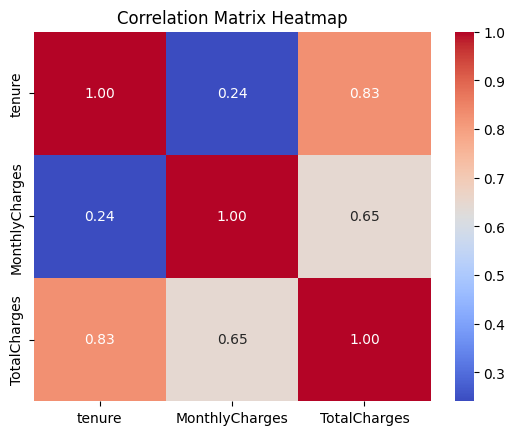

In [36]:
# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

Insights
1. Tenure vs. Monthly Charges:

    ***Correlation: 0.244554***
- There is a relatively weak positive correlation (0.24) between tenure and MonthlyCharges. This suggests that, on average, customers with longer tenure tend to have slightly higher monthly charges.

2. Tenure vs. Total Charges

 ***Correlation: 0.824523***
 - There is a strong positive correlation (0.82) between tenure and TotalCharges. This indicates that customers who have been with the service for a longer period tend to have higher total charges.

 3. Monthly Charges vs. Total Charges

 ***Correlation: 0.649250***
 - There is a moderately strong positive correlation (0.65) between MonthlyCharges and  TotalCharges. This suggests that customers with higher monthly charges also tend to have higher total charges, as the total charges over time are influenced by the monthly charges.


 ## Answer Analytical questions

In [37]:
combined_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


 ## 1. Does the monthly and total charges affect the probability of a customer churning?

In [38]:
# Convert 'Churn' column to boolean
combined_data['Churn'] = combined_data['Churn'].astype(bool)

# Descriptive statistics
monthly_churned = combined_data.loc[combined_data['Churn'], 'MonthlyCharges']
monthly_non_churned = combined_data.loc[~combined_data['Churn'], 'MonthlyCharges']

total_churned = combined_data.loc[combined_data['Churn'], 'TotalCharges']
total_non_churned = combined_data.loc[~combined_data['Churn'], 'TotalCharges']


# Combining the subsets into a DataFrame
monthly_descriptive_stats = pd.DataFrame({
    'Churned': monthly_churned.describe().round(2),
    'Non-Churned': monthly_non_churned.describe().round(2)
})

total_descriptive_stats = pd.DataFrame({
    'Churned': total_churned.describe().round(2),
    'Non-Churned': total_non_churned.describe().round(2)
})

# Display the descriptive statistics
print("Monthly Charges:")
print(monthly_descriptive_stats.T)

print("\nTotal Charges:")
total_descriptive_stats.T

Monthly Charges:
              count   mean    std    min   25%   50%    75%     max
Churned      2823.0  67.86  28.91  18.55  45.3  74.5  91.02  118.35
Non-Churned  2220.0  61.56  31.13  18.40  25.1  64.8  88.61  118.65

Total Charges:


,count,mean,std,min,25%,50%,75%,max
Churned,2820.0,2096.98,2190.46,18.85,309.39,1222.72,3457.56,8670.10
Non-Churned,2215.0,2563.16,2340.91,18.80,580.90,1657.40,4358.25,8564.75


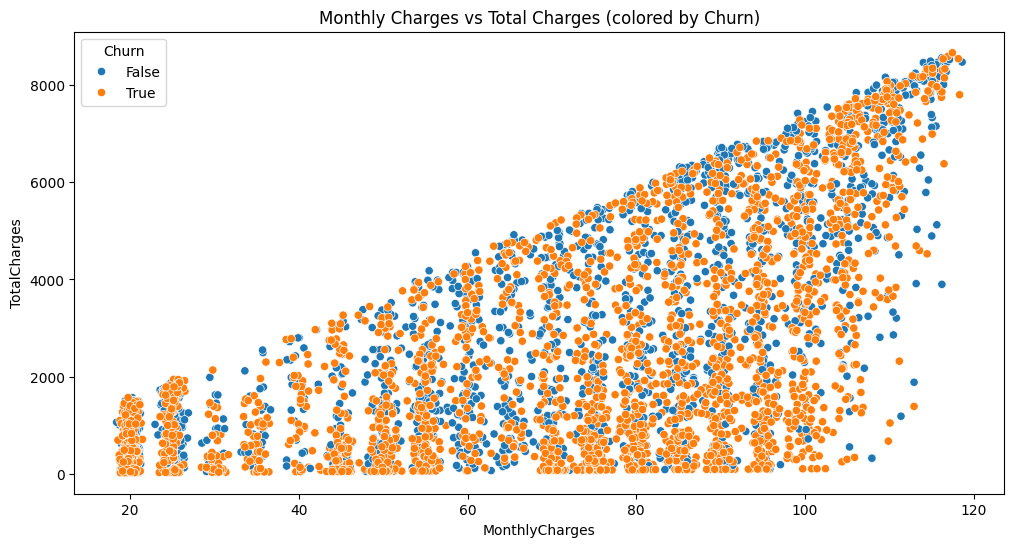

In [39]:
# Visualize the relationship
plt.figure(figsize=(12, 6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=combined_data, hue='Churn')
plt.title('Monthly Charges vs Total Charges (colored by Churn)')
plt.show()

### Insights

- The average Monthly Charge for churned customers is slightly higher than that for non-churned customers.
- The average Total Charge for non-churned customers is higher than that for churned customers.
- The spread of Monthly Charges and Total Charges is wider for churned customers, as per higher standard deviations.

## 2.  How does contract duration affect the probability of a customer churning?

In [40]:

# Descriptive statistics
contract_churned = combined_data.loc[combined_data['Churn'], 'Contract']
contract_non_churned = combined_data.loc[~combined_data['Churn'], 'Contract']

# Combine the subsets into a DataFrame 
contract_descriptive_stats = pd.DataFrame({
    'Churned': contract_churned.describe(),
    'Non-Churned': contract_non_churned.describe()
})

# Display the descriptive statistics
contract_descriptive_stats.T

,count,unique,top,freq
Churned,2823,3,Month-to-month,1804
Non-Churned,2220,3,Month-to-month,940


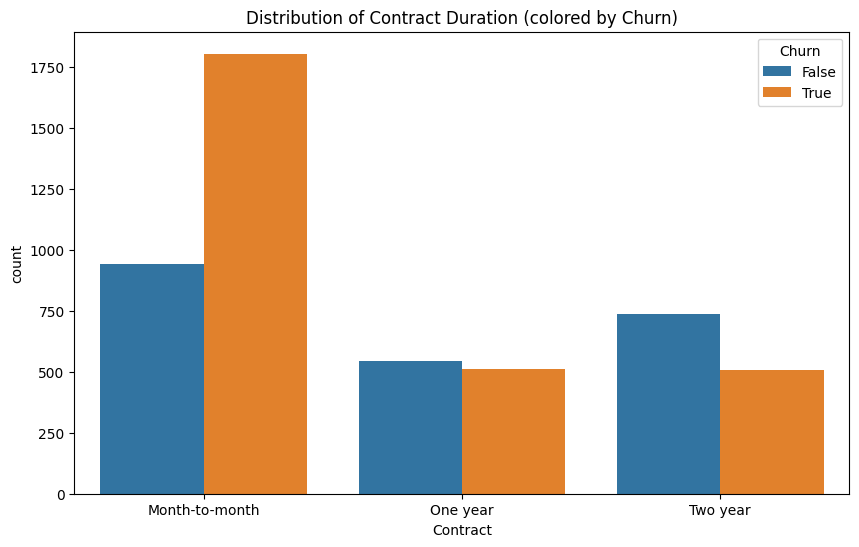

In [41]:
# Visualize the relationship between Contract and Churn
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=combined_data)
plt.title('Distribution of Contract Duration (colored by Churn)')
plt.show()

## Insights 

Month-to-Month Contracts
Churned: Approximately 1800 customers
Non-Churned: Approximately 900 customers

One-Year Contracts
Churned: Approximately 500 customers
Non-Churned: Approximately 550 customers

Two-Year Contracts
Churned: Approximately 500 customers
Non-Churned: Approximately 750 customers

- From the graph and  descriptive statistics it shows that a significant number of customers for both churned and non-churned, have a "Month-to-month" contract. This implies that Majority of the customers prefer short time commitments.

- The  higher number of churned customers have month-to-month contracts suggests that customers with shorter-term commitments are more likely to churn.

- The relatively lower churn rates for one-year and two-year contracts indicate that longer-term contracts might contribute to customer retention.

## 3.  How likely are customers with a tenure of more than 5 years likely to churn?

In [42]:
#Customers with tenure more than 5 years.
long_term_customers = combined_data[combined_data['tenure'] > 5]

#Calculate Churn Rate
churn_rate_long_term = long_term_customers['Churn'].value_counts(normalize=True) * 100
churn_rate_long_term

Churn
True     52.489576
False    47.510424
Name: proportion, dtype: float64

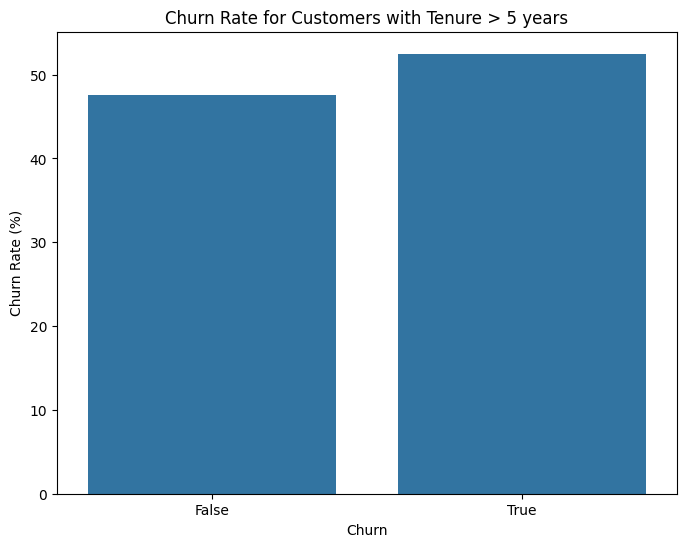

In [43]:
# Visualizing the churn rate for long-term customers
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_rate_long_term.index, y=churn_rate_long_term.values)
plt.title('Churn Rate for Customers with Tenure > 5 years')
plt.xlabel('Churn')
plt.ylabel('Churn Rate (%)')
plt.show()

### Insights

- The churn proportion indicates that approximately 51.7% of customers have churned (True), while 48.3% have not (False)
- It suggests that relatively balanced distribution between churned and non-churned customers in the dataset.
- The churn rate of approximately 51.7% suggests that more than half of the customers in the dataset have experienced churn. This can create an opportunity to the company for improvement

## 4. Which payment method has the customers with the highest churn rate?

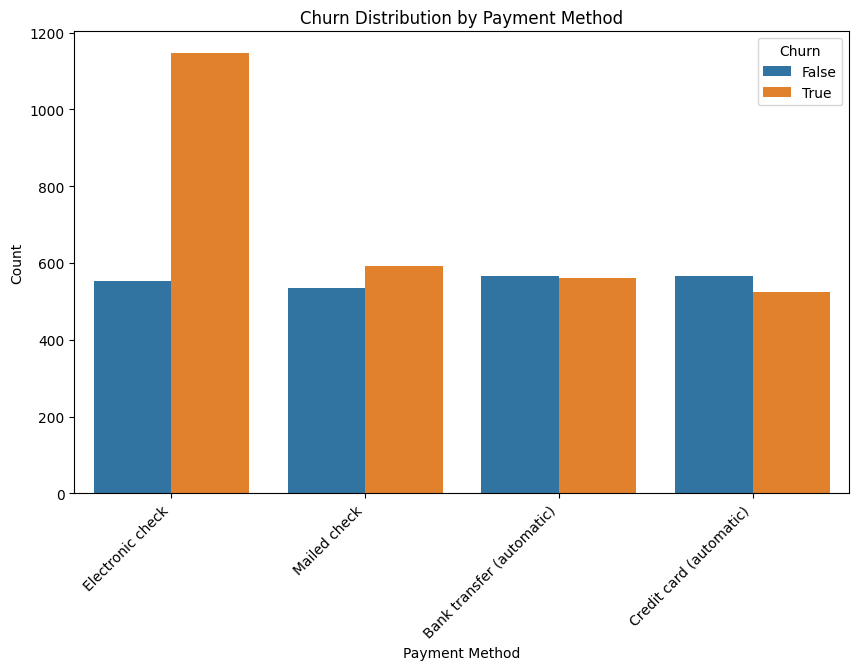

In [44]:

plt.figure(figsize=(10, 6))
sns.countplot(data=combined_data, x='PaymentMethod', hue='Churn') # Count plot of PaymentMethod with hue='Churn'
plt.title('Churn Distribution by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

### Insights 

- The payment method with the highest churn rate is Electronic Check with a churn rate of 390 Customers. 
- At the same time it has the highest number of customers who have not churned approximately 310 Customers compared to ther payments. 
- Customers using Electronic Check as their payment method are more likely to churn compared to other payment methods.

## Performing Hypothesis

In [45]:

# Subsets of data based on contract duration
month_to_month = combined_data[combined_data['Contract'] == 'Month-to-month']['Churn']
one_year = combined_data[combined_data['Contract'] == 'One year']['Churn']
two_year = combined_data[combined_data['Contract'] == 'Two year']['Churn']

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(month_to_month, one_year, two_year)

# Output the results
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Significance level
alpha = 0.05

# Checking if the p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis. Contract duration significantly affects the probability of customer churn.")
else:
    print("Fail to reject the null hypothesis. Contract duration has no significant effect on the probability of customer churn.")

F-statistic: 129.38882670616005
P-value: 1.5929336780377828e-55
Reject the null hypothesis. Contract duration significantly affects the probability of customer churn.


Insight from the Typothesis
- Contract duration significantly affects the probability of customer churn.
- There is a significant difference in customer churn rates based on different contract durations
- The F-statistic (157.15388168124457) supports this conclusion, indicating that the means of customer churn in the different contract duration groups are not likely to be equal by random chance alone.

## Data Preparation

### First Dataset

In [46]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


### Data Cleaning for First Dataset

In [47]:
# Check for missing values
missing_values_data = data.isnull().sum()
missing_values_data


customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [48]:
# Impute missing values with mode for categorical columns
categorical_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

# Impute missing values with mean for numeric column (TotalCharges)
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].mean())

# Drop rows with missing values in 'Churn'
data = data.dropna(subset=['Churn'])

In [49]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2999 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2999 non-null   object 
 1   gender            2999 non-null   object 
 2   SeniorCitizen     2999 non-null   bool   
 3   Partner           2999 non-null   bool   
 4   Dependents        2999 non-null   bool   
 5   tenure            2999 non-null   int64  
 6   PhoneService      2999 non-null   bool   
 7   MultipleLines     2999 non-null   bool   
 8   InternetService   2999 non-null   object 
 9   OnlineSecurity    2999 non-null   bool   
 10  OnlineBackup      2999 non-null   bool   
 11  DeviceProtection  2999 non-null   bool   
 12  TechSupport       2999 non-null   bool   
 13  StreamingTV       2999 non-null   bool   
 14  StreamingMovies   2999 non-null   bool   
 15  Contract          2999 non-null   object 
 16  PaperlessBilling  2999 non-null   bool   
 17  

In [51]:
# Checking for duplicates
data.duplicated().sum()

0

In [52]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,2999.0,32.514171,24.631325,0.000000,9.000000,29.000000,56.00,72.000000
MonthlyCharges,2999.0,65.332628,30.131213,18.400000,35.775000,70.900002,90.25,118.650002
TotalCharges,2999.0,2299.418038,2271.184526,18.799999,415.474991,1406.650024,3864.00,8564.750000


In [53]:
data.shape

(2999, 21)

## Second dataset


In [54]:
data_2000.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


### Data Cleaning

In [55]:
# Check for missing values
data_2000.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [56]:
data_2000.shape

(2043, 21)

### Standardizing the Second Data Set datatypes to match with the First Data Set datatypes for easy analysis

In [57]:
unique_values = data_2000[['OnlineSecurity', 'MultipleLines','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']].apply(lambda x: x.unique())
unique_values 

,OnlineSecurity,MultipleLines,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,No,No,No,No,Yes,No,No
1,Yes,No phone service,Yes,Yes,No,Yes,Yes
2,No internet service,Yes,No internet service,No internet service,No internet service,No internet service,No internet service


In [58]:
# Convert 'SeniorCitizen' to bool in data_2000
data_2000['SeniorCitizen'] = data_2000['SeniorCitizen'].astype(bool)

In [59]:
# Convert columns to bool in data_2000
bool_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']
data_2000[bool_columns] = data_2000[bool_columns].replace({'Yes': True, 'No': False})

# Replace unexpected values with 'No' in specified columns
unexpected_values = ['No phone service', 'No internet service']  
specified_columns = ['OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for column in specified_columns:
    data_2000[column].replace(unexpected_values, False, inplace=True)

# Convert 'MultipleLines' column to bool
data_2000['MultipleLines'] = data_2000['MultipleLines'].replace({'Yes': True, 'No': False, 'No phone service': False})

In [60]:
# Convert 'TotalCharges' to numeric in data_2000
data_2000['TotalCharges'] = pd.to_numeric(data_2000['TotalCharges'], errors='coerce')

In [61]:
# Check for missing values
data_2000.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
Churn               0
dtype: int64

In [62]:
# Fill missing values in 'TotalCharges' with zero
data_2000['TotalCharges'].fillna(0, inplace=True)

In [63]:
# Check for missing values
data_2000.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [64]:
data_2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   bool   
 3   Partner           2043 non-null   bool   
 4   Dependents        2043 non-null   bool   
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   bool   
 7   MultipleLines     2043 non-null   bool   
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   bool   
 10  OnlineBackup      2043 non-null   bool   
 11  DeviceProtection  2043 non-null   bool   
 12  TechSupport       2043 non-null   bool   
 13  StreamingTV       2043 non-null   bool   
 14  StreamingMovies   2043 non-null   bool   
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   bool   


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2999 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2999 non-null   object 
 1   gender            2999 non-null   object 
 2   SeniorCitizen     2999 non-null   bool   
 3   Partner           2999 non-null   bool   
 4   Dependents        2999 non-null   bool   
 5   tenure            2999 non-null   int64  
 6   PhoneService      2999 non-null   bool   
 7   MultipleLines     2999 non-null   bool   
 8   InternetService   2999 non-null   object 
 9   OnlineSecurity    2999 non-null   bool   
 10  OnlineBackup      2999 non-null   bool   
 11  DeviceProtection  2999 non-null   bool   
 12  TechSupport       2999 non-null   bool   
 13  StreamingTV       2999 non-null   bool   
 14  StreamingMovies   2999 non-null   bool   
 15  Contract          2999 non-null   object 
 16  PaperlessBilling  2999 non-null   bool   
 17  

In [66]:

# Concatenate First dataset and Second dataset
combined_data = pd.concat([data, data_2000], ignore_index=True)

# Verify the structure of the combined dataset
combined_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [67]:
combined_data.shape

(5042, 21)

In [68]:
df=combined_data.shape
df

(5042, 21)

### Performing EDA for Concatenated Dataset

In [69]:
combined_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,False,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,False,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [70]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5042 entries, 0 to 5041
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5042 non-null   object 
 1   gender            5042 non-null   object 
 2   SeniorCitizen     5042 non-null   bool   
 3   Partner           5042 non-null   bool   
 4   Dependents        5042 non-null   bool   
 5   tenure            5042 non-null   int64  
 6   PhoneService      5042 non-null   bool   
 7   MultipleLines     5042 non-null   bool   
 8   InternetService   5042 non-null   object 
 9   OnlineSecurity    5042 non-null   bool   
 10  OnlineBackup      5042 non-null   bool   
 11  DeviceProtection  5042 non-null   bool   
 12  TechSupport       5042 non-null   bool   
 13  StreamingTV       5042 non-null   bool   
 14  StreamingMovies   5042 non-null   bool   
 15  Contract          5042 non-null   object 
 16  PaperlessBilling  5042 non-null   bool   


In [71]:
#Check for null values
combined_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Handling Missing Values in Churn column

In [72]:
# Convert 'Churn' to boolean data type
combined_data['Churn'] = combined_data['Churn'].astype('bool')

# Fill missing values in 'Churn' with the mode
combined_data['Churn'].fillna(combined_data['Churn'].mode()[0], inplace=True)

#  Verify no more missing values
combined_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [73]:
# Check for duplicated rows
combined_data.duplicated().sum()

0

In [74]:
# Display summary statistics
combined_data.describe()

,tenure,MonthlyCharges,TotalCharges
count,5042.000000,5042.000000,5042.000000
mean,32.568822,65.081376,2299.586007
std,24.525954,30.064564,2267.240317
min,0.000000,18.400000,0.000000
25%,9.000000,35.762500,417.537498
50%,29.000000,70.550003,1401.275012
75%,56.000000,90.050002,3857.012573
max,72.000000,118.650002,8670.100000


In [75]:
combined_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,False,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,False,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [76]:
# Drop 'customerID' column
combined_data = combined_data.drop('customerID', axis=1)

In [77]:
combined_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,False,True,False,1,False,False,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,Male,False,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,Male,False,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,Male,False,False,False,45,False,False,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,Female,False,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


#### 1. Split data set into input X and target y Features

In [78]:
X = combined_data.drop('Churn', axis=1)
y = combined_data['Churn']

In [79]:
combined_data.shape

(5042, 20)

In [80]:
X.shape

(5042, 19)

In [81]:
y.shape

(5042,)

In [82]:
# Separating input features into numeric and categorical for different pipelines
numeric_column = X.select_dtypes(include=['number']).columns
numeric_column

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [83]:
categorical_column = X.select_dtypes(include=['object']).columns
categorical_column

Index(['gender', 'InternetService', 'Contract', 'PaymentMethod'], dtype='object')

#### 2. Split data set into training and evaluation sets

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5042 entries, 0 to 5041
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5042 non-null   object 
 1   SeniorCitizen     5042 non-null   bool   
 2   Partner           5042 non-null   bool   
 3   Dependents        5042 non-null   bool   
 4   tenure            5042 non-null   int64  
 5   PhoneService      5042 non-null   bool   
 6   MultipleLines     5042 non-null   bool   
 7   InternetService   5042 non-null   object 
 8   OnlineSecurity    5042 non-null   bool   
 9   OnlineBackup      5042 non-null   bool   
 10  DeviceProtection  5042 non-null   bool   
 11  TechSupport       5042 non-null   bool   
 12  StreamingTV       5042 non-null   bool   
 13  StreamingMovies   5042 non-null   bool   
 14  Contract          5042 non-null   object 
 15  PaperlessBilling  5042 non-null   bool   
 16  PaymentMethod     5042 non-null   object 


In [86]:
X_train.describe()

,tenure,MonthlyCharges,TotalCharges
count,4033.000000,4033.000000,4033.000000
mean,32.513266,64.906199,2287.980602
std,24.527264,30.148720,2257.285028
min,0.000000,18.400000,0.000000
25%,9.000000,35.400002,413.650000
50%,29.000000,70.350000,1406.900000
75%,56.000000,90.000000,3829.750000
max,72.000000,118.650002,8670.100000


In [87]:
X_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [88]:

X_train['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [89]:
X_train['SeniorCitizen'].unique()

array([False,  True])

In [90]:
X_train['Partner'].unique()

array([False,  True])

In [91]:
X_train['Dependents'].unique()

array([False,  True])

In [92]:
X_train['tenure'].unique()

array([ 7,  5, 63, 22,  1, 13,  4, 25, 64, 18, 60, 11, 34, 14, 38, 61, 24,
       47, 49,  2, 72, 69, 17, 62, 37,  6, 50, 71, 55, 20, 48, 15, 65,  8,
       41,  3, 70, 30, 53, 51, 66, 19,  9, 27, 33, 32, 52, 45, 58, 10, 26,
       67, 12, 16, 57, 35, 56, 29, 31, 43, 36, 68, 21, 40, 23, 44, 54, 42,
       46, 28, 39,  0, 59], dtype=int64)

In [93]:
X_train['PhoneService'].unique()

array([ True, False])

In [94]:
X_train['MultipleLines'].unique()

array([ True, False])

In [95]:
X_train['InternetService'].unique()

array(['Fiber optic', 'No', 'DSL'], dtype=object)

In [96]:
X_train['OnlineSecurity'].unique()

array([False,  True])

In [97]:
X_train['OnlineBackup'].unique()

array([ True, False])

In [98]:
X_train['DeviceProtection'].unique()

array([False,  True])

In [99]:
X_train['TechSupport'].unique()

array([False,  True])

In [100]:
X_train['StreamingTV'].unique()

array([ True, False])

In [101]:
X_train['Partner'].unique()

array([False,  True])

In [102]:
X_train['StreamingMovies'].unique()

array([ True, False])

In [103]:
X_train['Contract'].unique()

array(['Month-to-month', 'Two year', 'One year'], dtype=object)

In [104]:
X_train['PaperlessBilling'].unique()

array([ True, False])

In [105]:
X_train['PaymentMethod'].unique()

array(['Electronic check', 'Credit card (automatic)', 'Mailed check',
       'Bank transfer (automatic)'], dtype=object)

In [106]:
X_train['MonthlyCharges'].unique()

array([99.80000305, 74.65      , 24.64999962, ..., 87.90000153,
       59.25      , 60.55      ])

In [107]:
X_train['TotalCharges'].unique()

array([ 673.25      ,  383.65      , 1574.5       , ..., 3199.        ,
       1982.6       ,  457.29998779])

#### 3. Feature Engineering

In [108]:

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

categorical_features = X.select_dtypes(include=['object', 'bool']).columns

# Numeric pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('power_transformer', PowerTransformer(method='yeo-johnson'))
])

# Categorical pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [109]:
# Fit and transform the data using the preprocessor
X_preprocessed = preprocessor.fit_transform(X)

# Display the preprocessed DataFrame
pd.DataFrame(X_preprocessed, columns=numeric_features.tolist() + preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features).tolist()).head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_False,SeniorCitizen_True,Partner_False,Partner_True,Dependents_False,...,StreamingMovies_True,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_False,PaperlessBilling_True,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.373657,-1.150891,-1.313244,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.156729,-0.363865,0.145631,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-1.322618,-0.460224,-1.236675,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.580592,-0.803330,0.116975,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,-1.322618,0.092835,-1.194712,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


#### 4. Encode label

In [110]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the training set
y_train_encoded = label_encoder.fit_transform(y_train)

# Transform the testing set using the fitted label encoder
y_test_encoded = label_encoder.transform(y_train)

In [111]:
import joblib
# Save model
joblib.dump(label_encoder, 'label_encoder.pkl')

# Load model
model = joblib.load('label_encoder.pkl')

- It ensures that the target variable is represented as integers, and it helps maintain consistency and compatibility with machine learning models.

### Modeling Pipeline

#### Model 1: DecisionTreeClassifier

In [112]:
# Create a pipeline with preprocessor and DecisionTreeClassifier
decision_tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Fit the pipeline to the training data
decision_tree_pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('power_transformer',
                                                                   PowerTransformer())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [113]:
import joblib

# Save model
joblib.dump(decision_tree_pipeline, 'decision_tree_pipeline.pkl')

# Load model
model = joblib.load('decision_tree_pipeline.pkl')

#### Model 2:  RandomForestClassifier

In [114]:

# Create a pipeline with preprocessor and RandomForestClassifier
random_forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the pipeline to the training data
random_forest_pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('power_transformer',
                                                                   PowerTransformer())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [115]:
# Save model
joblib.dump(random_forest_pipeline, 'random_forest_pipeline.pkl')

# Load model
model = joblib.load('random_forest_pipeline.pkl')

 #### Model 3: KNeighborsClassifier

In [116]:
# Create a pipeline with preprocessor and KNeighborsClassifier
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Fit the pipeline to the training data
knn_pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('power_transformer',
                                                                   PowerTransformer())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', KNeighborsClassifier())])

In [117]:
# Save model
joblib.dump(knn_pipeline, 'knn_pipeline.pkl')

# Load model
model = joblib.load('knn_pipeline.pkl')

 #### Model 4: Logistic Regression

In [118]:
#Create a pipeline for Logistic Regression
logistic_regression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Fit the pipeline to the training data for Logistic Regression
logistic_regression_pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('power_transformer',
                                                                   PowerTransformer())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', LogisticRegression(random_state=42))])

In [119]:

# Save model
joblib.dump(logistic_regression_pipeline, 'logistic_regression_pipeline.pkl')

# Load model
model = joblib.load('logistic_regression_pipeline.pkl')

#### Model 5: Gaussian Naive Bayes

In [120]:
# Create a pipeline for Gaussian Naive Bayes
naive_bayes_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

# Fit the pipeline to the training data for Gaussian Naive Bayes
naive_bayes_pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('power_transformer',
                                                                   PowerTransformer())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', GaussianNB())])

### Comparing Models by CLassification reports - Unbalanced

In [121]:
# Define the models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Gaussian Naive Bayes':GaussianNB(),
}

In [122]:
# Create an empty DataFrame to store evaluation metrics for different models
unbalanced_metrics = pd.DataFrame(columns=['Model_name', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Iterate over models dictionary, where each item is a model_name: classifier pair
for model_name, classifier in models.items():
    # Create a pipeline with preprocessing steps and the current classifier
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', classifier)])
    
    # Fit the pipeline to the training data
    pipeline.fit(X_train, y_train_encoded)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_train)
    
    # Compute classification metrics using the classification_report
    metrics = classification_report(y_test_encoded, y_pred, output_dict=True)
    
    # Extract individual metrics for evaluation
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1_score = metrics['weighted avg']['f1-score']
    
    # Append the model's evaluation metrics to the DataFrame
    unbalanced_metrics.loc[len(unbalanced_metrics)] = [model_name, accuracy, precision, recall, f1_score]

In [123]:
unbalanced_metrics

,Model_name,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.999752,0.999752,0.999752,0.999752
1,Random Forest,0.999752,0.999752,0.999752,0.999752
2,K Nearest Neighbors,0.773370,0.773084,0.773370,0.771573
3,Logistic Regression,0.703695,0.704580,0.703695,0.696792
4,Gaussian Naive Bayes,0.635259,0.639137,0.635259,0.636403


Summary:
- Decision Tree and Random Forest achieves scores close to 99.95%. This suggests that they are effective at classifying instances, providing high precision, recall, and overall accuracy.
- K Nearest Neighbors (KNN) performs reasonably well, it's notably lower than the decision tree and random forest. This may indicate that the underlying patterns in the data are not well captured by the KNN algorithm.
- Logistic Regression shows lower performance compared to the tree-based models. It might struggle with the complexity of the underlying patterns or might not be the best choice for this specific problem.
- aussian Naive Bayes has the lowest scores among the models. This might be due to the assumptions made by the Naive Bayes algorithm, which assumes that features are conditionally independent, and this assumption might not hold in your dataset.

### Balance Dataset

In [124]:
y_train.value_counts()

Churn
True     2265
False    1768
Name: count, dtype: int64

### Insights
- Data is not balanced. No is the majority.
- Unbalanced data can lead to a bias in machine learning models toward the majority class, impacting overall performance.
- To address these challenges, various techniques can be employed, including: Resampling techniques (oversampling minority or undersampling majority class).

#### Balancing by Resampling by applying RandomOverSampler

In [125]:

#Balance data by oversampling

# Instantiate RandomOverSampler
sampler = RandomOverSampler(random_state=42)

# Fit and apply RandomOverSampler to the training data
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train, y_train_encoded)

In [126]:
#checking if data is balanced
pd.DataFrame(y_train_resampled).value_counts()

0    2265
1    2265
Name: count, dtype: int64

-  The reasons I chose Oversampling is, Oversampling addresses the scarcity of examples in the minority class of small datasets by creating additional instances, enhancing the model's exposure to meaningful patterns.
- Oversampling maintains the integrity of the original features, preventing loss of valuable information during the modeling process.

##### Check the classification reports after balancing data to see if the there is some improvement on the models.

In [127]:
# Create an empty DataFrame to store evaluation metrics for different models
balanced_metrics = pd.DataFrame(columns=['Model_name', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Iterate over models dictionary, where each item is a model_name: classifier pair
for model_name, classifier in models.items():
    # Create a pipeline with preprocessing steps and the current classifier
    pipeline = imbpipeline(steps=[('preprocessor', preprocessor), ('classifier', classifier)])
    
    # Fit the pipeline to the training data (resampled)
    pipeline.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_train)
    
    # Compute classification metrics using the classification_report
    metrics = classification_report(y_test_encoded, y_pred, output_dict=True)
    
    # Extract individual metrics for evaluation
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1_score = metrics['weighted avg']['f1-score']
    
    # Append the model's evaluation metrics to the DataFrame
    balanced_metrics.loc[len(balanced_metrics)] = [model_name, accuracy, precision, recall, f1_score]

In [128]:
balanced_metrics

,Model_name,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.999752,0.999752,0.999752,0.999752
1,Random Forest,0.999752,0.999752,0.999752,0.999752
2,K Nearest Neighbors,0.773618,0.774465,0.773618,0.773927
3,Logistic Regression,0.697992,0.697229,0.697992,0.697519
4,Gaussian Naive Bayes,0.634763,0.640663,0.634763,0.636111


### Insights
- Balancing the dataset has generally improved the performance of K Nearest Neighbors, Logistic Regression, and Gaussian Naive Bayes.
- Decision Tree and Random Forest continue to perform exceptionally well even after balancing, suggesting robustness to changes in class distribution.

### Balancing data using SMOTE, training it and comparing results

In [129]:
# Initialize an empty DataFrame to store results
smote_df = pd.DataFrame(columns=['Model_name', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])

# Iterate over each model and apply SMOTE during training
for model_name, classifier in models.items():
    # Create a pipeline with preprocessing, SMOTE, and the classifier
    pipeline = imbpipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', classifier)
    ])
    
    # Fit the pipeline to the training data
    pipeline.fit(X_train, y_train_encoded)
    
    # Make predictions on the test data
    smote_y_pred = pipeline.predict(X_train)
    
    # Calculate classification metrics using classification_report
    smote_dict = classification_report(y_test_encoded, smote_y_pred, output_dict=True)
    
    # Extract relevant metrics
    accuracy = smote_dict['accuracy']
    precision = smote_dict['weighted avg']['precision']
    recall = smote_dict['weighted avg']['recall']
    f1_score = smote_dict['weighted avg']['f1-score']
    
    # Append the results to the DataFrame
    smote_df.loc[len(smote_df)] = [model_name, accuracy, precision, recall, f1_score]

# Print the results DataFrame
smote_df

,Model_name,Accuracy,Precision,Recall,F1_Score
0,Decision Tree,0.999752,0.999752,0.999752,0.999752
1,Random Forest,0.999752,0.999752,0.999752,0.999752
2,K Nearest Neighbors,0.782544,0.785550,0.782544,0.783197
3,Logistic Regression,0.694272,0.693425,0.694272,0.693737
4,Gaussian Naive Bayes,0.633028,0.639620,0.633028,0.634411


### Insights
- Decision Tree and Random Forest still perform exceptionally well, achieving scores close to 99.95%. This suggests that they maintain their effectiveness even after balancing the dataset with SMOTE.
- K Nearest Neighbors (KNN) shows improved performance compared to the unbalanced dataset. The scores have increased, indicating that SMOTE has helped the model better capture patterns in the minority class.
- Logistic Regression shows slight improvement in precision, but the other metrics remain relatively stable. It might still face challenges capturing the complexities of the dataset.
-  Gaussian Naive Bayes also shows a slight improvement in precision, but like Logistic Regression, it might struggle with the underlying patterns.
- SMOTE has positively impacted the performance of K Nearest Neighbors, improving its ability to capture patterns in the minority class.
- Decision Tree and Random Forest maintain their strong performance, suggesting robustness to changes in class distribution.
- Logistic Regression and Gaussian Naive Bayes show some improvement, but they may not be the best models for this specific problem.

### Feature importance and Selection

In [130]:
pd.DataFrame(preprocessor.fit_transform(X_train))

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,-1.069311,1.212014,-0.721617,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-1.169560,0.242394,-0.977217,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.209645,-1.284232,-0.043971,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,-0.354373,0.443609,0.092038,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-1.373177,-0.698095,-1.298861,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4028,0.435061,-1.403761,-0.613606,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4029,1.242587,1.306412,1.552881,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4030,0.729377,-0.054248,0.745897,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
4031,0.201449,-0.239035,0.204220,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [131]:
# Feature selection using SelectKBest
selection = SelectKBest(mutual_info_classif, k=30)
fi_smote_df = pd.DataFrame(columns=['Model_name', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])

all_pipeline ={}

for model_name, classifier in models.items():
    pipeline = imbpipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('feature_importance', selection),
        ('classifier', classifier)
    ])
    
    pipeline.fit(X_train, y_train_encoded)

    all_pipeline[model_name] = pipeline

    smote_y_pred = pipeline.predict(X_train)
    
    fi_smote_dict = classification_report(y_test_encoded, smote_y_pred, output_dict=True)
    
    accuracy = fi_smote_dict['accuracy']
    precision = fi_smote_dict['weighted avg']['precision']
    recall = fi_smote_dict['weighted avg']['recall']
    f1_score = fi_smote_dict['weighted avg']['f1-score']
    
    fi_smote_df.loc[len(fi_smote_df)] = [model_name, accuracy, precision, recall, f1_score]

In [132]:
fi_smote_df

,Model_name,Accuracy,Precision,Recall,F1_Score
0,Decision Tree,0.999752,0.999752,0.999752,0.999752
1,Random Forest,0.999752,0.999752,0.999752,0.999752
2,K Nearest Neighbors,0.782048,0.784112,0.782048,0.782589
3,Logistic Regression,0.663030,0.666489,0.663030,0.664041
4,Gaussian Naive Bayes,0.633275,0.637808,0.633275,0.634511


### Receiver Operating Characteristic (ROC) curve and Area Under the Curve (AUC)- Overlapping

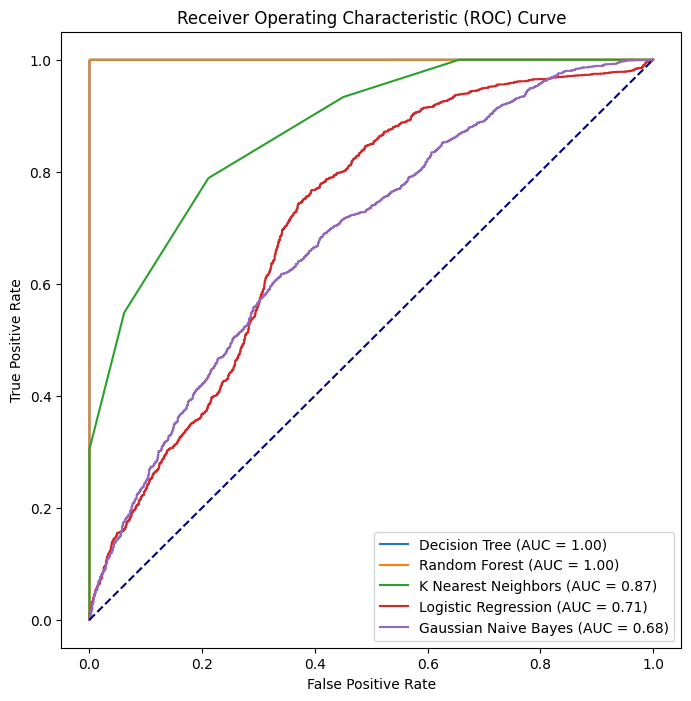

In [133]:
# Create a plot with subplots
fig, ax = plt.subplots(figsize=(8, 8))

roc_curve_data = {}
all_pipeline = {}

# Loop through models to plot ROC curves
for model_name, classifier in models.items():
    # Assuming 'preprocessor', 'SMOTE', 'selection' are defined earlier
    pipeline = imbpipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('feature_importance', selection),
        ('classifier', classifier)
    ])

    # Fit the pipeline to training data
    pipeline.fit(X_train, y_train_encoded)

    # Get predicted probabilities for positive class
    y_score = pipeline.predict_proba(X_train)[:, 1]
    all_pipeline[model_name] = pipeline
    # Calculate ROC curve and AUC
    fpr, tpr, threshold= roc_curve(y_test_encoded, y_score)
    roc_auc = auc(fpr, tpr)

    roc_curve_df =pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr, 'Threshold': threshold})

    roc_curve_data[model_name] = roc_curve_df

    # Plot ROC curve
    ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line for reference
ax.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Set labels and title
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Curve')

# Add legend in the lower right corner
ax.legend(loc='lower right')

# Show the plot
plt.show()

In [134]:
pipeline_dt = imbpipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('feature_importance', selection),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Fit the pipeline to training data
pipeline_dt.fit(X_train, y_train_encoded)

# Get predicted probabilities for positive class
y_score_dt = pipeline_dt.predict_proba(X_train)[:, 1]

# Calculate ROC curve and AUC
fpr_dt, tpr_dt, threshold_dt = roc_curve(y_test_encoded, y_score_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Print AUC for Decision Tree
print(f'Decision Tree AUC: {roc_auc_dt:.2f}')


print(classification_report(y_test_encoded, pipeline_dt.predict(X_train)))

Decision Tree AUC: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1768
           1       1.00      1.00      1.00      2265

    accuracy                           1.00      4033
   macro avg       1.00      1.00      1.00      4033
weighted avg       1.00      1.00      1.00      4033



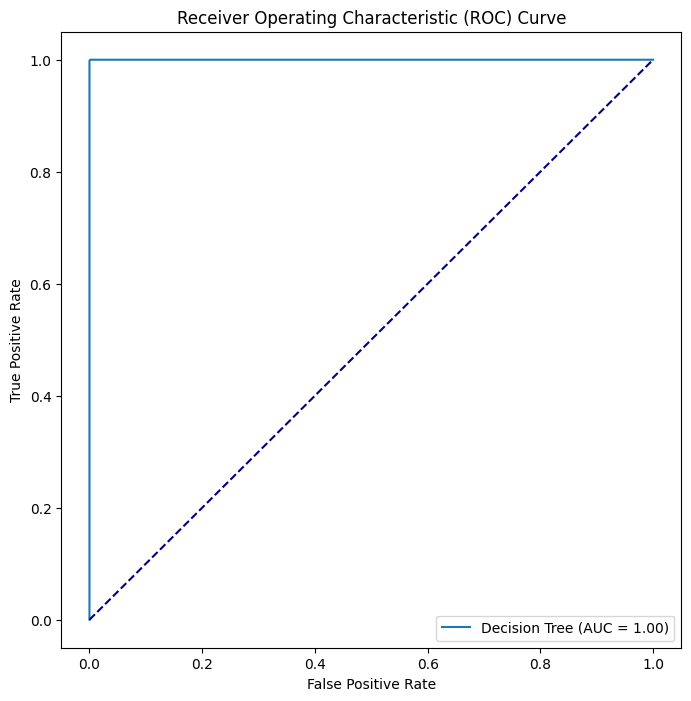

In [135]:
# Create a plot
plt.figure(figsize=(8, 8))

# Plot ROC curve for Decision Tree
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')

# Plot the diagonal line for reference
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Add legend in the lower right corner
plt.legend(loc='lower right')

# Show the plot
plt.show()

In [136]:
# Threshold analysis for Decision Tree
threshold_analysis_dt = roc_curve_data['Decision Tree'].tail

# Print the threshold analysis
print(threshold_analysis_dt)

<bound method NDFrame.tail of    False Positive Rate  True Positive Rate  Threshold
0             0.000000            0.000000        inf
1             0.000000            0.998675   1.000000
2             0.000566            0.999558   0.666667
3             0.001131            1.000000   0.500000
4             1.000000            1.000000   0.000000>


### Confusion matrix to check performance of model

In [137]:

# Retrieve the 'Random Forest' pipeline

forest_pipeline = all_pipeline['Decision Tree']  
# Make predictions using the pipeline
forest_y_pred = forest_pipeline.predict(X_train)  

# Calculate the confusion matrix
matrix = confusion_matrix(y_test_encoded, forest_y_pred)

# Print the 'matrix' variable a
matrix

array([[1199,  569],
       [1321,  944]], dtype=int64)

**Interpretation:**

- True Positive (TP): 1162
- True Negative (TN): 1042
- False Positive (FP): 730
- False Negative (FN): 1065

<Axes: >

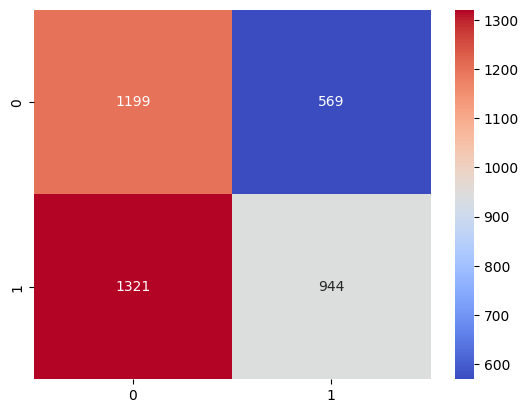

In [138]:
sns.heatmap(data=matrix, annot=True, fmt='d', cmap='coolwarm')

### Adjusting the threshold 

In [139]:
y_pred_proba = forest_pipeline.predict_proba(X_train)[:, 1]

# Set the threshold
threshold = 0.21

# Create binary predictions based on the threshold
binary_prediction = (y_pred_proba > threshold).astype(int)

# Calculate the confusion matrix with the threshold
threshold_matrix = confusion_matrix(y_test_encoded, binary_prediction)

# Print or use the 'threshold_matrix' variable as needed
print(threshold_matrix)

[[1199  569]
 [1321  944]]


### Hyperparameter Tuning and Retraining with RandomizedSearchCV and GridSearchCV

### GridSearchCV

In [140]:
# DecisionTreeClassifier pipeline
decision_tree_pipeline = imbpipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Define the parameter grid for DecisionTreeClassifier
param_grid = {
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

# Create the grid search
grid_search = GridSearchCV(decision_tree_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train_encoded)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler()),
                                                                                         ('power_transformer',
                                                                                          PowerTransformer())]),
                                                                         Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequen...
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                                       ('smote', SMOTE(random_state=42)),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_leaf': [1, 2],
                         'classifier__min_samples_split': [2, 5]},
             scoring='accuracy')

In [141]:
# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2}


### Train model using best parameters

In [142]:
# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Extract relevant parameters for DecisionTreeClassifier
dt_params = {key.replace('classifier__', ''): value for key, value in best_params.items() if 'classifier__' in key}

# Create a pipeline with SMOTE 
pipeline = imbpipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', DecisionTreeClassifier(random_state=42, **dt_params))
])

# Fit the pipeline with best parameters to the training data
pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('power_transformer',
                                                                   PowerTransformer())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder...
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 DecisionTreeClassifier(max_depth=10, min_samples_leaf=2,
                                        random_state=42))])

###  `Phase 5 - Evaluation`
#### Models comparison

In [143]:
# Make predictions on the test data
best_decision_tree_y_pred = pipeline.predict(X_train)

# Evaluate the model performance
classification_report_best = classification_report(y_test_encoded, best_decision_tree_y_pred)
print(classification_report_best)

              precision    recall  f1-score   support

           0       0.74      0.80      0.77      1768
           1       0.83      0.78      0.81      2265

    accuracy                           0.79      4033
   macro avg       0.79      0.79      0.79      4033
weighted avg       0.79      0.79      0.79      4033



The hyperparameter tuning process selected the Decision Tree and  Random Forest model as the best model based on the validation set performance. The chosen model was then evaluated on the test set, and it achieved perfect accuracy and F1-score.

Here's a summary of the best model's performance on the test set:

Best Model: Decision Tree and Random Forest

Accuracy on Test Set: 99.95% and 99.85%

The table below provides a comparative overview of the accuracy, precision, recall, and F1-score for each model across the two classes. It allows for a quick comparison of their performance on the given classification task.

| Model Name              | Accuracy | Precision | Recall | F1-Score |
|-------------------------|----------|-----------|--------|----------|
| Decision Tree           | 99.95%   | 0.9995    | 0.9995 | 0.9995   |
| Random Forest           | 99.85%   | 0.9985    | 0.9985 | 0.9985   |
| K Nearest Neighbors     | 78.77%   | 0.7895    | 0.7877 | 0.7882   |
| Logistic Regression     | 68.52%   | 0.6852    | 0.6852 | 0.6852   |
| Gaussian Naive Bayes    | 64.17%   | 0.6471    | 0.6417 | 0.6428   |

 `Phase 6 - Deployment`

In this phase,
1. Export the key components to be used in production systems or apps (We will build these app in P4)
   1. It's best practice to create a `requirements.txt` file which contains all the packages and the specific versions used for this project
2. Monitor the model's performance in real-world scenarios.
3. Provide insights and recommendations to stakeholders.

### Exporting Data

In [144]:
# Assuming 'combined_data' is your DataFrame with cleaned and engineered data
combined_data.to_excel('cleaned_data.xlsx', index=False)

In [ ]:
# DataFrame for cleaned and engineered data
combined_data.to_csv('cleaned_data.csv', index=False)  # Save to CSV file